In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################

QubitHamiltonian

(-0.32760818995565577+0j) [] +
(-0.04919764587885283+0j) [X0 X1 Y2 Y3] +
(0.04919764587885283+0j) [X0 Y1 Y2 X3] +
(0.04919764587885283+0j) [Y0 X1 X2 Y3] +
(-0.04919764587885283+0j) [Y0 Y1 X2 X3] +
(0.1371657293179602+0j) [Z0] +
(0.15660062486143395+0j) [Z0 Z1] +
(0.10622904488350779+0j) [Z0 Z2] +
(0.15542669076236065+0j) [Z0 Z3] +
(0.1371657293179602+0j) [Z1] +
(0.15542669076236065+0j) [Z1 Z2] +
(0.10622904488350779+0j) [Z1 Z3] +
(-0.13036292044009176+0j) [Z2] +
(0.1632676867167479+0j) [Z2 Z3] +
(-0.13036292044009176+0j) [Z3]

In [4]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
                                                                                                             double_cc_amplitudes=None, 
                                                                                                             singles_hamiltonian=None,
                                                                                                             doubles_hamiltonian=None, 
                                                                                                             tol_filter_small_terms = None)

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ops_ia,
                                                                                                                    Sec_Quant_CC_ops_ijab,
                                                                                                                   transformation='JW')
input_state = ansatz_obj.Get_JW_HF_state_in_OCC_basis()
print(input_state)

[1, 1, 0, 0]


In [5]:
UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
                                         Theta_param_list_ijab=theta_parameters_ijab,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

0: ───X───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────@───────────H──────────Rx(0.5π)───@──────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───H──────────@──────────────────────────────@──────────H───────────Rx(0.5π)───@───────────────────────────────────────@───────────Rx(-0.5π)───H──────────@───────────────────────────────────────@───────────H───────────H───@───────────────────────────────────────@──────────H───Rx(0.5π)───@──────────────────────────────────────@───Rx(-0.5π)───
                     │                       │                   │                      │                                                                                                                    │                               │                                 │                              │                                  │                              │                          │                              │                                 │                                       │                                  │                                       │                           │                                       │                         │                                      │
1: ───X──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H───X───@───────────────────────@───X───────────H──────────Rx(0.5π)───X───@──────────────────────@───X───────────Rx(-0.5π)───H──────────X───@──────────────────────@───X───H───────────Rx(0.5π)───X───@──────────────────────@───X──────────Rx(-0.5π)───H──────────X───@───────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@───────────────────────@───────────X───────────Rx(-0.5π)───H───X───@───────────────────────@───────────X──────────H───Rx(0.5π)───X───@──────────────────────@───────────X───Rx(-0.5π)───
                         │               │                           │              │                          │                       │                   │                      │                              │                       │                                         │                      │                                          │                      │                                  │                      │                                         │                       │                                                  │                       │                                           │                       │                                         │                      │
2: ───I───H──────────────X───Rz(-0.0π)───X───H───Rx(0.5π)────────────X───Rz(0.0π)───X───Rx(-0.5π)──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───────────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@──────────────@───X───Rx(-0.5π)───H──────────────────────────X───@──────────────@───X───H───H──────────────────────────X───@──────────────@───X───H──────────Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───H───────────────────X───@───────────────@───X───────────H──────────H──────────────────X───@──────────────@───X───────────H───────────────
                                                                                                                   │               │                           │              │                                      │               │                                                 │              │                                                  │              │                                          │             

In [6]:
from quchem.Simulating_Quantum_Circuit import *

In [7]:
n_shots= 1000


def VQE_experiment_ENERGY(theta_ia_ijab_combined_list):
    theta_params_ia = [theta_ia_ijab_combined_list[0], theta_ia_ijab_combined_list[1]]
    theta_params_ijab = [theta_ia_ijab_combined_list[2]]
    
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_params_ia, 
                                                                         Theta_param_list_ijab=theta_params_ijab,
                                                                         ia_first=True)
    

    VQE_exp = VQE_Experiment(QubitHamiltonian, ansatz_cirq_circuit, n_shots)
    return VQE_exp.Calc_Energy().real

In [8]:
theta_combined = [1,2, np.pi]

VQE_experiment_ENERGY(theta_combined)

-0.39972916283855753

In [13]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(Sec_Quant_CC_ops_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(Sec_Quant_CC_ops_ijab))]

theta_combined_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

0: Input_to_Funct: [2.56400955 1.39744585 5.28072938]: Output: -0.7600250012039341
1: Input_to_Funct: [2.43580907 1.51389968 4.92868075]: Output: -0.809045673632666
2: Input_to_Funct: [2.43580907 1.51389968 4.92868075]: Output: -0.7835190354819438
3: Input_to_Funct: [2.35034209 1.42850021 4.95801814]: Output: -0.8564376380357367
4: Input_to_Funct: [2.13667463 1.59929915 4.6353069 ]: Output: -0.8932451057860638
5: Input_to_Funct: [2.13667463 1.59929915 4.6353069 ]: Output: -0.8982839651438598
6: Input_to_Funct: [2.13667463 1.59929915 4.6353069 ]: Output: -0.8664119850862534
7: Input_to_Funct: [2.07969664 1.47249387 4.91890162]: Output: -0.9834631971161942
8: Input_to_Funct: [2.07969664 1.47249387 4.91890162]: Output: -0.9859517147247762
9: Input_to_Funct: [2.07969664 1.47249387 4.91890162]: Output: -1.0018854229587963
10: Input_to_Funct: [1.93408622 1.49003383 4.93954645]: Output: -1.049043973517018
11: Input_to_Funct: [1.93408622 1.49003383 4.93954645]: Output: -1.035535745233242
12: I

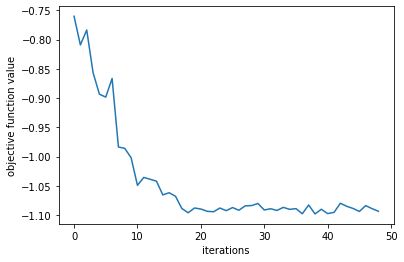

In [14]:
### optimizer
from quchem.Scipy_Optimizer import *

# Nelder-Mead
GG = Optimizer(VQE_experiment_ENERGY,
                   theta_combined_random_input,
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   display_convergence_message=True,
                   display_steps=True)

GG.get_env(50)
GG.plot_convergence()
plt.show()

In [8]:
Hamilt.molecule.fci_energy

array(-1.10115033)

### Gradient optimzation

**gradient is given by**

https://arxiv.org/pdf/1906.08728.pdf

$$\frac{\partial O(\theta)}{\partial \theta}=\left\langle\overrightarrow{0}\left|\hat{U}^{\dagger} \hat{R}_{y}^{C \dagger}(\theta+\pi / 4) \hat{V}^{\dagger} \hat{O} \hat{V} \hat{R}_{y}^{C}(\theta+\pi / 4) \hat{U}\right| \overrightarrow{0}\right\rangle -\left\langle\overrightarrow{0}\left|\hat{U}^{\dagger} \hat{R}_{y}^{C \dagger}(\theta-\pi / 4) \hat{V}^{\dagger} \hat{O} \hat{V} \hat{R}_{y}^{C}(\theta-\pi / 4) \hat{U}\right| \overrightarrow{0}\right\rangle$$

$$\frac{\partial O(\theta)}{\partial \theta} =O(\theta+\pi / 4)-O(\theta-\pi / 4)$$

In [16]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = VQE_experiment_ENERGY(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = VQE_experiment_ENERGY(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

note:
this is very SLOW as it has to run a separate experiment TWICE for each parameter before taking a step!

In [18]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

0: Input_to_Funct: [2.46400955 1.29744586 5.18072939]: Output: -0.8040395971972989
1: Input_to_Funct: [2.36392988 1.20429506 5.12905712]: Output: -0.8838578330856676
2: Input_to_Funct: [2.26369924 1.13128338 5.15837905]: Output: -0.9096299842683362
3: Input_to_Funct: [2.16440843 1.08285788 5.21095781]: Output: -0.9454151422924444
4: Input_to_Funct: [2.0695034  1.05205663 5.25726943]: Output: -0.9777648325055845
5: Input_to_Funct: [1.98411564 1.03688565 5.26835974]: Output: -0.9563023082425942
6: Input_to_Funct: [1.91295406 1.03970678 5.23882461]: Output: -0.9741141421373057
7: Input_to_Funct: [1.85711502 1.06181758 5.19070783]: Output: -0.9921894834249421
8: Input_to_Funct: [1.81466747 1.09946707 5.12799596]: Output: -0.9969209238854516
9: Input_to_Funct: [1.78142412 1.15073565 5.05688246]: Output: -1.034155597766912
10: Input_to_Funct: [1.7519966  1.21244375 4.98239444]: Output: -1.0363819368259126
11: Input_to_Funct: [1.72429468 1.2813638  4.91144698]: Output: -1.0567543313837175
12:

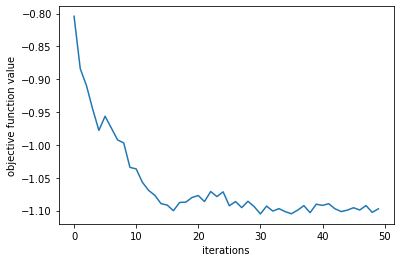

In [20]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(VQE_experiment_ENERGY,
                   theta_combined_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(50)
GG.plot_convergence()
plt.show()